# KNN

In [9]:
from util.functions import impute_and_train
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier


In [10]:
df_numeric = pd.read_csv('processed/df_numeric.csv').dropna()

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df_numeric.drop(columns=['class'])
y = df_numeric['class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of SVC
knn = KNeighborsClassifier()

# Define the grid of hyperparameters to search over
param_grid = {
    'n_neighbors': range(1,12),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'manhattan']
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Access the best hyperparameters and the best model found
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"Best Parameters: {best_params}")

# Optionally, evaluate the best model on the test data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Accuracy: {accuracy}")


/Users/ahmed/anaconda3/envs/nom/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ahmed/anaconda3/envs/nom/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/ahmed/anaconda3/envs/nom/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/ahmed/anaconda3/envs/nom/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/ahmed/anaconda3/envs/nom/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/ahmed/anaconda3/envs/nom/lib/python3.10/site-packages/skl

Best Parameters: {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best Model Accuracy: 0.6956521739130435


/Users/ahmed/anaconda3/envs/nom/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ahmed/anaconda3/envs/nom/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/ahmed/anaconda3/envs/nom/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/ahmed/anaconda3/envs/nom/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/ahmed/anaconda3/envs/nom/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/ahmed/anaconda3/envs/nom/lib/python3.10/site-packages/skl

In [12]:
df_num = pd.read_csv('processed/df_numeric.csv')

results = impute_and_train(df_num ,KNeighborsClassifier, best_params)

learning with mean imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with median imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with mode imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with KNN imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with MICE imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with iterative imputed data
Cross-validation iteration 

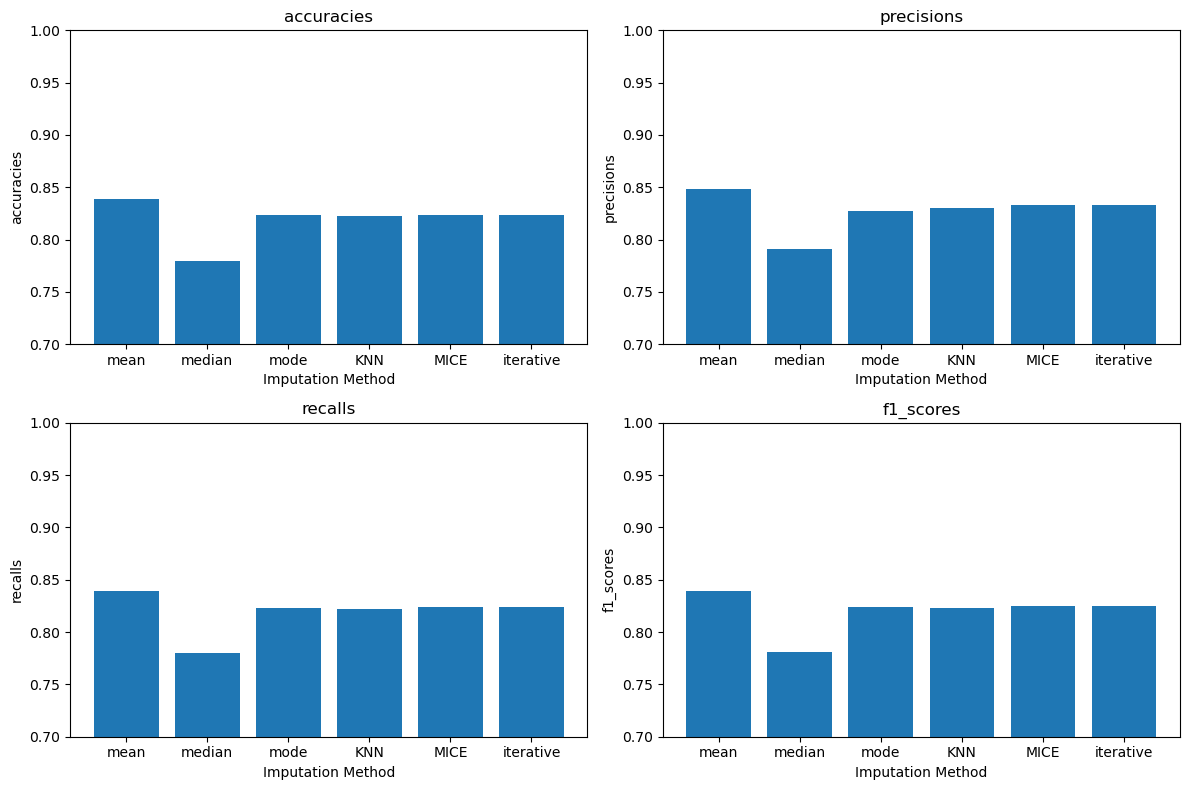

In [13]:
from util.functions import plot_metrics
plot_metrics(results['metrics'])


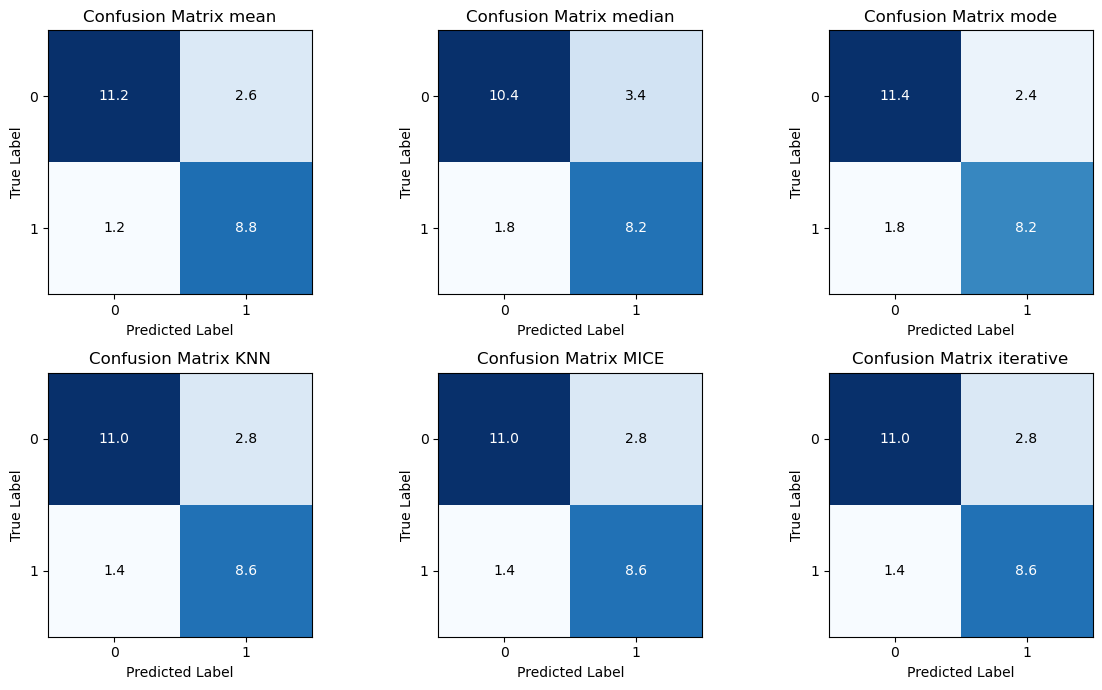

In [14]:
from util.functions import plot_mean_confusion_matrices
plot_mean_confusion_matrices(results['confusion_matrices'])

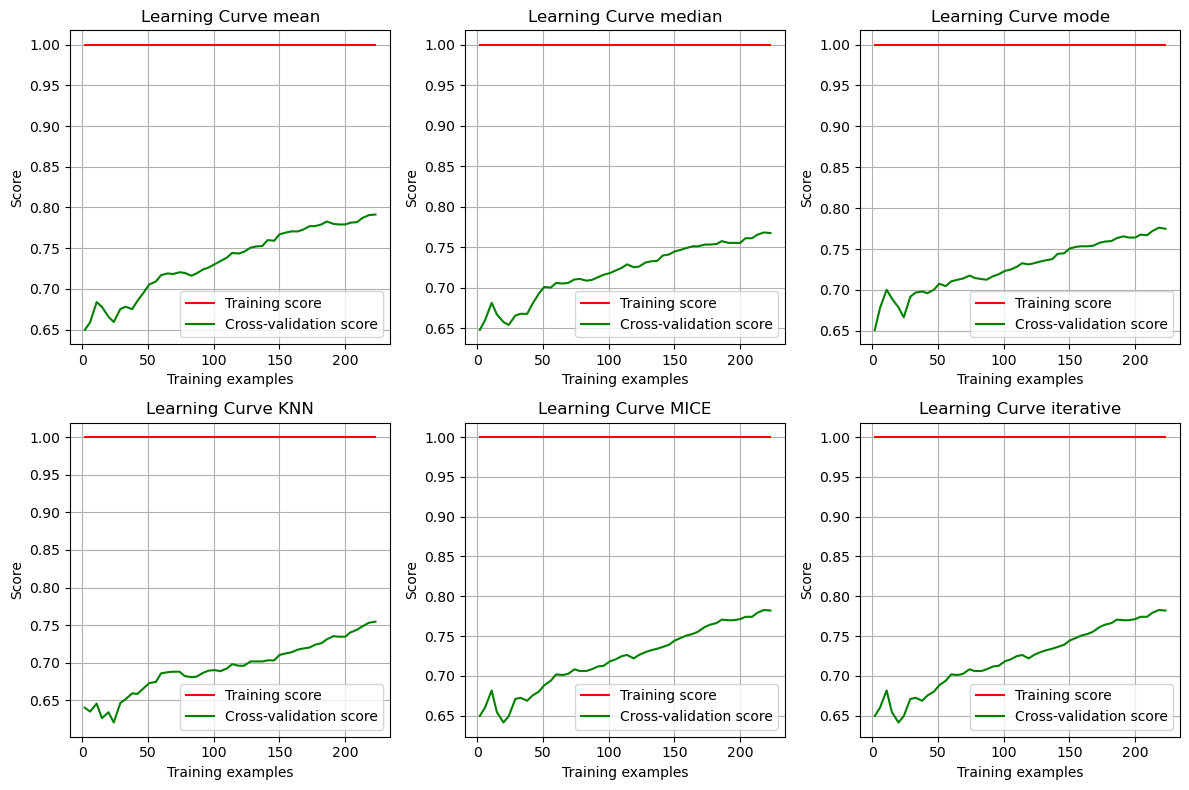

In [15]:
from util.functions import plot_learning_curves
plot_learning_curves(results['learning_curves'])

In [51]:
from csv import QUOTE_NONE, QUOTE_NONNUMERIC
import numpy as np

metrics_knn = results['metrics']

metrics_knn = pd.DataFrame(metrics_knn)

for col in metrics_knn.columns:
    print(col)

m = []
for col in metrics_knn.columns:
    m.append(metrics_knn[col])

#print(m)

l = []



for i in range(4):
    for j in m[i]:
        l.append(j)

mean = []

for i in l:
    mean.append(np.mean(i))

print(mean)

print(mean[6:12])

mean_dict = {
    'accuracies': mean[0:6],
    'precisions': mean[6:12],
    'recalls': mean[12:18],
    'f1_scores': mean[18:24]
}

mean_df = pd.DataFrame(mean_dict)

mean_df



mean_df.to_csv('metrics_knn.csv', index = False, quoting= QUOTE_NONNUMERIC, quotechar= '"')

mean_df

accuracies
precisions
recalls
f1_scores
[0.8388314583966757, 0.7799027059896625, 0.8230845241714807, 0.8220811796898753, 0.8237255498125065, 0.8237255498125065, 0.8479548430635386, 0.7911823241171068, 0.8270727762575589, 0.8302845007720328, 0.8334975062117005, 0.8334975062117005, 0.8388314583966757, 0.7799027059896625, 0.8230845241714807, 0.8220811796898753, 0.8237255498125065, 0.8237255498125065, 0.8391252580065016, 0.7805539964651461, 0.8235583257322387, 0.8227225778215143, 0.8251758629107881, 0.8251758629107881]
[0.8479548430635386, 0.7911823241171068, 0.8270727762575589, 0.8302845007720328, 0.8334975062117005, 0.8334975062117005]


,accuracies,precisions,recalls,f1_scores
0,0.838831,0.847955,0.838831,0.839125
1,0.779903,0.791182,0.779903,0.780554
2,0.823085,0.827073,0.823085,0.823558
3,0.822081,0.830285,0.822081,0.822723
4,0.823726,0.833498,0.823726,0.825176
5,0.823726,0.833498,0.823726,0.825176


### Feature importances are not easy to see for KNN classifiers.

